**Correlation between news and stock movement**

In [73]:
import pandas as pd  #importing neccessary libraries for the operation
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk


In [74]:
try:
    # Attempt to load your actual news data file
    news_df = pd.read_csv(r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\news_data_processed.csv')
    print("Loaded news_data.csv from file.")
except FileNotFoundError:
    print("news_data.csv not found. Using dummy news data for demonstration.")

# --- Stock Data (Dictionary of DataFrames) ---
#Stock data source path

AAPL_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\AAPL_stock_data.csv'
AMZN_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\AMZN_stock_data.csv'
GOOG_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\GOOG_stock_data.csv'
META_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\META_stock_data.csv'
MSFT_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\MSFT_stock_data.csv'
NVDA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\NVDA_stock_data.csv'
TSLA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\TSLA_stock_data.csv'

#Loading Stock data from csv
try:
    AAPL_df = pd.read_csv(AAPL_path)
    print(f"Data loaded successfully from AAPL")
    AMZN_df = pd.read_csv(AMZN_path)
    print(f"Data loaded successfully from AMZN")
    GOOG_df = pd.read_csv(GOOG_path)
    print(f"Data loaded successfully from GOOG")
    META_df = pd.read_csv(META_path)
    print(f"Data loaded successfully from META")
    MSFT_df = pd.read_csv(MSFT_path)
    print(f"Data loaded successfully from MSFT")
    NVDA_df = pd.read_csv(NVDA_path)
    print(f"Data loaded successfully from NVDA")
    TSLA_df = pd.read_csv(TSLA_path)
    print(f"Data loaded successfully from TSLA")
except FileNotFoundError:
    print(f"Error: The file AAPL_path was not found. Please check the path.")
    print(f"Error: The file AMZN_path was not found. Please check the path.")
    print(f"Error: The file GOOG_path was not found. Please check the path.")
    print(f"Error: The file META_path was not found. Please check the path.")
    print(f"Error: The file MSFT_path was not found. Please check the path.")
    print(f"Error: The file NVDA_path was not found. Please check the path.")
    print(f"Error: The file TSLA_path was not found. Please check the path.")
print("Stock data loaded")

stock_data = {
     "AAPL": AAPL_df,
     "AMZN": AMZN_df,
     "MSFT":MSFT_df,
     "TSLA":TSLA_df,
     "META":META_df,
     "NVDA":NVDA_df,
     "GOOG":GOOG_df,
                   }

stock_data["AAPL"]

Loaded news_data.csv from file.
Data loaded successfully from AAPL
Data loaded successfully from AMZN
Data loaded successfully from GOOG
Data loaded successfully from META
Data loaded successfully from MSFT
Data loaded successfully from NVDA
Data loaded successfully from TSLA
Stock data loaded


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist,Daily_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.052171
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.073398
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.024751
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.028992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,4.662717,6.678882,-2.016164,-0.028754
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,3.748082,6.092722,-2.344640,-0.004805
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,3.026267,5.479431,-2.453164,0.002161
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184,2.448591,4.873263,-2.424672,0.001285


In [75]:

print("\n--- Phase 2: Daily Returns & Sentiment Aggregation Starting ---")

columns_to_check_for_nan = ['Daily_Return', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']

all_daily_returns = []
processed_individual_stock_dfs = {}

# Iterate through each stock's DataFrame in the 'stock_data' dictionary (from pre-processing)
for ticker, df in stock_data.items():

    if 'Daily_Return' in df.columns:
        df.rename(columns={'Daily_Return': 'daily_return'}, inplace=True)
        print(f"  {ticker}: 'Daily_Return' found. Renaming to 'daily_return' for consistency.")
    elif 'daily_return' in df.columns:
        print(f"  {ticker}: 'daily_return' found. Using existing column.")
    else: # Fallback: calculate if neither 'Daily_Return' nor 'daily_return' exists
        print(f"  {ticker}: Neither 'Daily_Return' nor 'daily_return' found. Calculating daily percentage change from 'Close'.")


--- Phase 2: Daily Returns & Sentiment Aggregation Starting ---
  AAPL: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  AMZN: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  MSFT: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  TSLA: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  META: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  NVDA: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  GOOG: 'Daily_Return' found. Renaming to 'daily_return' for consistency.


In [76]:
if isinstance(df.index, pd.DatetimeIndex) or df.index.name in ['Date', 'date']:
        df.reset_index(inplace=True)
        # After reset_index, the former index becomes a column. Its name depends on the original index name.
        # Let's ensure it's named 'date' (lowercase)
        if df.columns[0] == 'Date': # If original index name was 'Date'
            df.rename(columns={'Date': 'date'}, inplace=True)
            print(f"  {ticker}: 'Date' from index reset to column 'date'.")
        elif df.columns[0] == 'date': # If original index name was 'date'
            print(f"  {ticker}: 'date' from index reset to column 'date'.")
        else: # If index had no name, it might be an unnamed column (0)
            df.rename(columns={df.columns[0]: 'date'}, inplace=True)
            print(f"  {ticker}: Unnamed index reset to column 'date'.")
elif 'Date' in df.columns and 'date' not in df.columns:
        df.rename(columns={'Date': 'date'}, inplace=True)
        print(f"  {ticker}: Renamed 'Date' column to 'date'.")
elif 'date' not in df.columns: # If no date column or index found
        print(f"  Warning: {ticker} has no discernible 'date' column or date in index. Skipping this ticker.")
    
      
    # Ensure 'date' column is in datetime format for robust operations
df['date'] = pd.to_datetime(df['date'])
    # Convert to date objects for consistency with news_df if news_df uses date objects
df['date'] = df['date'].dt.date

    # Ensure data is sorted by the standardized 'date' column
df.sort_values(by='date', inplace=True)

  GOOG: Renamed 'Date' column to 'date'.


In [77]:
for col_name in ['SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']:
        if col_name not in df.columns:
            print(f"  Warning: Expected column '{col_name}' not found for {ticker}. Check your input data.")


In [78]:
df['ticker'] = ticker
if 'date' in df.columns and 'daily_return' in df.columns:
        all_daily_returns.append(df[['date', 'ticker', 'daily_return']])
        processed_individual_stock_dfs[ticker] = df # Store the fully processed DataFrame
else:
        print(f"  Warning: Skipping {ticker} from aggregation due to missing 'date' or 'daily_return' column after processing steps.")

In [79]:
if all_daily_returns:
    combined_returns_df = pd.concat(all_daily_returns)

    # Calculate the average daily return across all tickers for each specific day.
    average_daily_stock_movement = combined_returns_df.groupby('date')['daily_return'].mean().reset_index()
    average_daily_stock_movement['average_daily_return_percent'] = average_daily_stock_movement['daily_return'] * 100
    average_daily_stock_movement.rename(columns={'daily_return': 'average_daily_return_decimal'}, inplace=True)
    print("\nAverage Daily Stock Movement (Portfolio Level, first 5 rows):")
    print(average_daily_stock_movement.head())
    print(f"Shape of average_daily_stock_movement: {average_daily_stock_movement.shape}")
else:
    print("\nNo valid stock data found after processing. Cannot calculate average daily stock movement.")
    average_daily_stock_movement = pd.DataFrame() # Create an empty DataFrame to prevent downstream errors




Average Daily Stock Movement (Portfolio Level, first 5 rows):
         date  average_daily_return_decimal  average_daily_return_percent
0  2004-08-19                           NaN                           NaN
1  2004-08-20                      0.079430                      7.942989
2  2004-08-23                      0.010064                      1.006362
3  2004-08-24                     -0.041408                     -4.140766
4  2004-08-25                      0.010775                      1.077510
Shape of average_daily_stock_movement: (5020, 3)


In [80]:
if 'Date' in news_df.columns and 'date' not in news_df.columns:
    news_df.rename(columns={'Date': 'date'}, inplace=True)
    print("News_df: Renamed 'Date' column to 'date'.")
# Also convert to datetime and then date object if it's not already
if 'date' in news_df.columns:
    news_df['date'] = pd.to_datetime(news_df['date']).dt.date

In [81]:
news_df

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.00
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,0.15
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,0.15
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,0.00
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,0.00


In [82]:
if 'date' in news_df.columns and 'Sentiment' in news_df.columns:
    daily_general_sentiment = news_df.groupby('date')['Sentiment'].mean().reset_index()
    daily_general_sentiment.rename(columns={'Sentiment': 'average_daily_general_sentiment'}, inplace=True)
    print("\nAggregated Daily General Market Sentiment (first 5 rows):")
    print(daily_general_sentiment.head())
    print(f"Shape of daily_general_sentiment: {daily_general_sentiment.shape}")
else:
    print("\nError: News_df is missing 'date' or 'sentiment_score' column. Cannot aggregate sentiment.")
    daily_general_sentiment = pd.DataFrame() # Create an empty DataFrame to prevent downstream errors

print("\n--- Phase 2: Daily Returns & Sentiment Aggregation Complete ---")


Aggregated Daily General Market Sentiment (first 5 rows):
         date  average_daily_general_sentiment
0  2009-02-14                         0.000000
1  2009-04-27                         0.000000
2  2009-04-29                         0.000000
3  2009-05-22                         0.000000
4  2009-05-27                         0.234091
Shape of daily_general_sentiment: (3955, 2)

--- Phase 2: Daily Returns & Sentiment Aggregation Complete ---


In [83]:
# --- 3.1. Merge DataFrames for Correlation ---
# Merge the daily general sentiment with the average daily stock movement.
# We use an 'inner' merge to ensure that only dates present in *both* datasets are included in the correlation.
merged_correlation_df = pd.merge(
    daily_general_sentiment,
    average_daily_stock_movement[['date', 'average_daily_return_percent']],
    on='date',
    how='inner' # Only keep dates where both sentiment and stock returns are available
)

# Drop any remaining NaN values in the merged DataFrame.
# This is a final safeguard in case any NaNs slipped through or resulted from the merge itself.
merged_correlation_df.dropna(inplace=True)

print("\nMerged Data for General Correlation Analysis (first 5 rows):")
print(merged_correlation_df.head())
print(f"Shape of merged_correlation_df: {merged_correlation_df.shape}")


Merged Data for General Correlation Analysis (first 5 rows):
         date  average_daily_general_sentiment  average_daily_return_percent
0  2009-04-27                         0.000000                     -0.908886
1  2009-04-29                         0.000000                      2.022370
2  2009-05-22                         0.000000                     -0.756625
3  2009-05-27                         0.234091                      0.296767
4  2009-05-29                         0.068182                      1.664223
Shape of merged_correlation_df: (2757, 3)


In [84]:
# --- 3.2. Calculate Correlation Coefficient ---
# Check if there are enough data points to calculate a meaningful correlation (at least 2 data points)
if len(merged_correlation_df) > 1:
    # Calculate the Pearson correlation coefficient between average daily general news sentiment and average daily stock returns
    correlation = merged_correlation_df['average_daily_general_sentiment'].corr(merged_correlation_df['average_daily_return_percent'])

    print(f"\n--- KPI: Correlation Strength ---")
    print(f"Pearson Correlation between Average Daily General News Sentiment and Average Daily Stock Returns: {correlation:.4f}")

    # Interpret the strength and direction of the correlation
    if abs(correlation) >= 0.7: strength = "Very Strong"
    elif abs(correlation) >= 0.5: strength = "Strong"
    elif abs(correlation) >= 0.3: strength = "Moderate"
    elif abs(correlation) >= 0.1: strength = "Weak"
    else: strength = "Very Weak/No"

    direction = "positive" if correlation > 0 else "negative" if correlation < 0 else "no"
    print(f"Interpretation: There is a {strength} {direction} linear correlation.")


--- KPI: Correlation Strength ---
Pearson Correlation between Average Daily General News Sentiment and Average Daily Stock Returns: 0.0173
Interpretation: There is a Very Weak/No positive linear correlation.


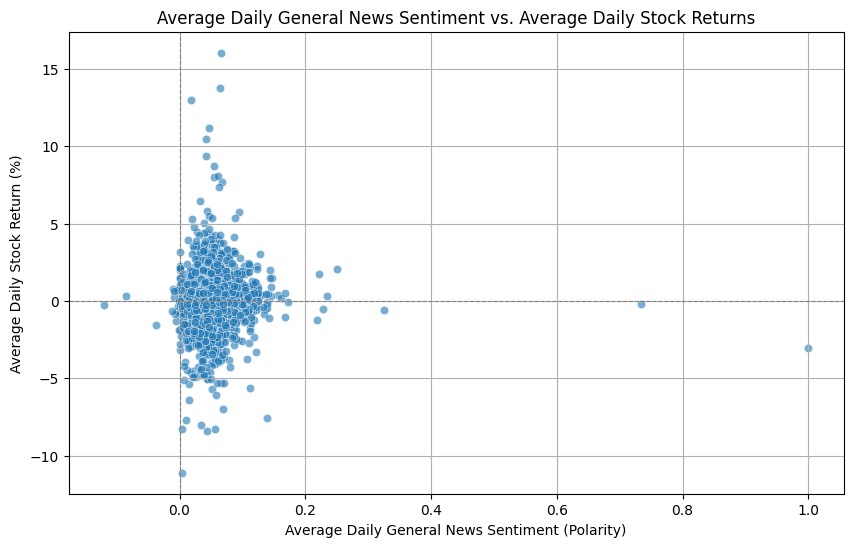

In [88]:
# --- 3.3. Visualize Correlation with a Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
        x='average_daily_general_sentiment',
        y='average_daily_return_percent',
        data=merged_correlation_df,
        alpha=0.6) # Make points slightly transparent for better visibility of overlaps)
plt.title('Average Daily General News Sentiment vs. Average Daily Stock Returns')
plt.xlabel('Average Daily General News Sentiment (Polarity)')
plt.ylabel('Average Daily Stock Return (%)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Horizontal line at 0% return
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Vertical line at 0 sentiment
plt.show()


In [91]:
# --- 3.4. Exporting Key Processed DataFrames to CSV (Recommended) ---
# Save the final merged correlation DataFrame
import os
processed_data_dir='data\Processed_data'
correlation_output_path = os.path.join(processed_data_dir, 'merged_sentiment_stock_correlation.csv')
merged_correlation_df.to_csv(correlation_output_path, index=False)
print(f"Saved merged correlation results to: {correlation_output_path}")

# You might also want to save the aggregated daily sentiment and stock movement data (if not done in Phase 2)
sentiment_output_path = os.path.join(processed_data_dir, 'daily_general_sentiment_aggregated.csv')
daily_general_sentiment.to_csv(sentiment_output_path, index=False)
print(f"Saved aggregated daily general sentiment to: {sentiment_output_path}")

stock_movement_output_path = os.path.join(processed_data_dir, 'average_daily_stock_movement_aggregated.csv')

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\hp\AppData\Local\Temp\ipykernel_6052\1615819419.py:4: SyntaxWarning: invalid escape sequence '\P'
  processed_data_dir='data\Processed_data'


Saved merged correlation results to: data\Processed_data\merged_sentiment_stock_correlation.csv
Saved aggregated daily general sentiment to: data\Processed_data\daily_general_sentiment_aggregated.csv
